In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dython.nominal import associations

In [4]:
clean_reg = pd.read_csv('content/regs_with_activity_stats.csv')

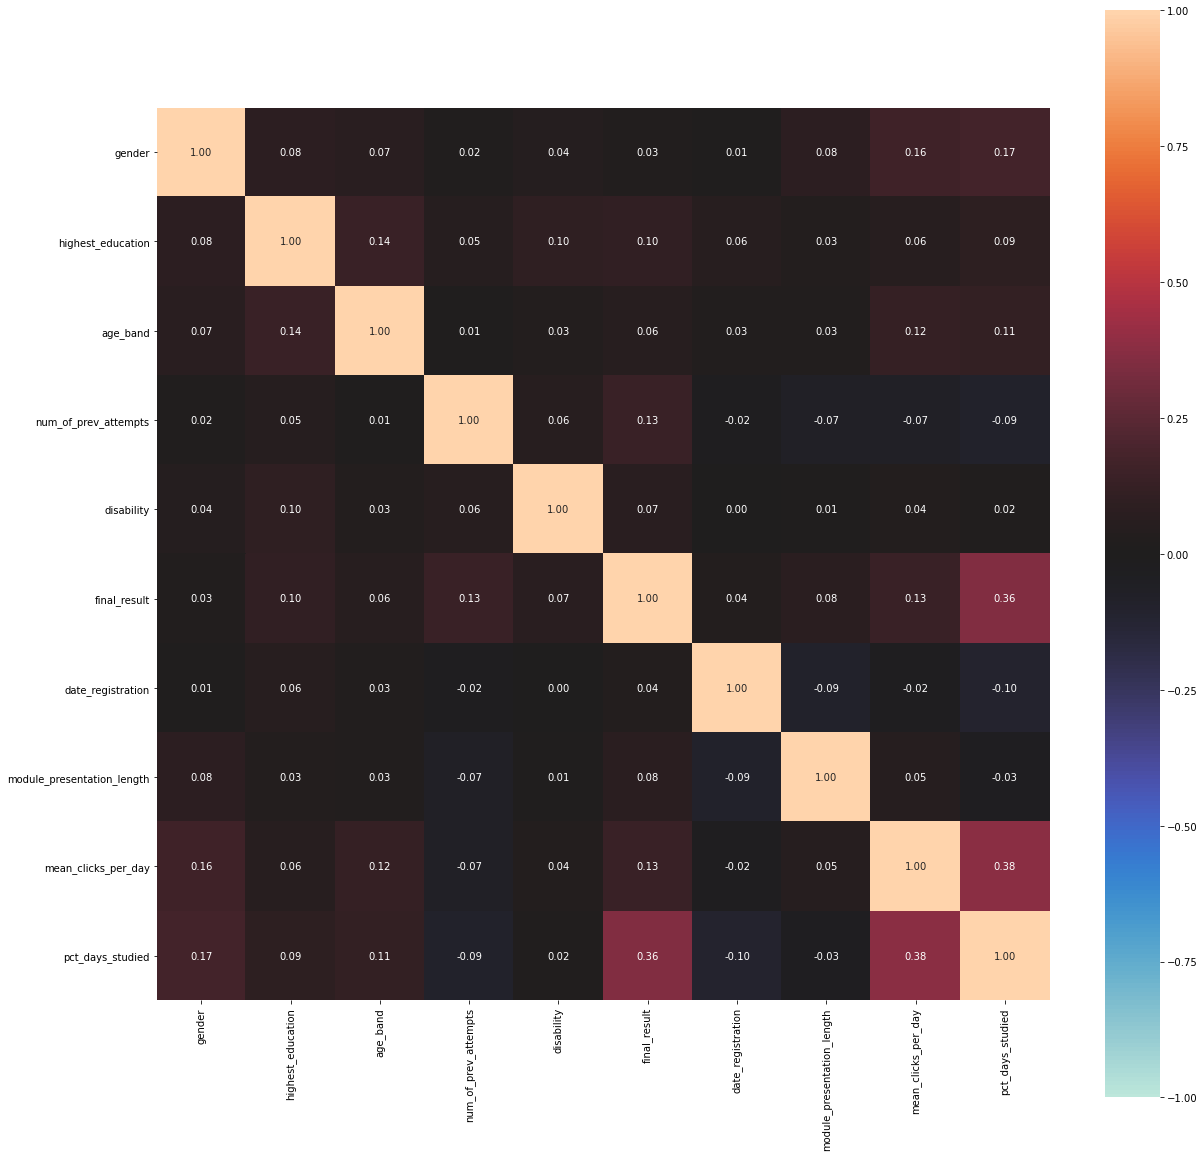

In [7]:
full_results = associations(clean_reg.drop(columns = ['total_days_studied','avg_daily_activities','code_module','code_presentation','id_student']),
            figsize = (20,20))
full_results['ax']

In [4]:
full_results['corr']['final_result'].sort_values()

gender                        0.020232
age_band                      0.057710
disability                    0.064943
module_presentation_length    0.067475
highest_education             0.101751
num_of_prev_attempts          0.118829
date_registration             0.126549
studied_credits               0.191949
avg_daily_activities          0.302436
date_unregistration           0.451362
total_days_studied            0.645608
final_result                  1.000000
Name: final_result, dtype: float64

In [6]:
temp_reg = clean_reg.drop(columns = ['Unnamed: 0','code_module','code_presentation','id_student'])
temp_reg = temp_reg[temp_reg['final_result'] != 'Withdrawn']
temp_reg.final_result.value_counts()

Pass           12360
Fail            7047
Distinction     3024
Name: final_result, dtype: int64

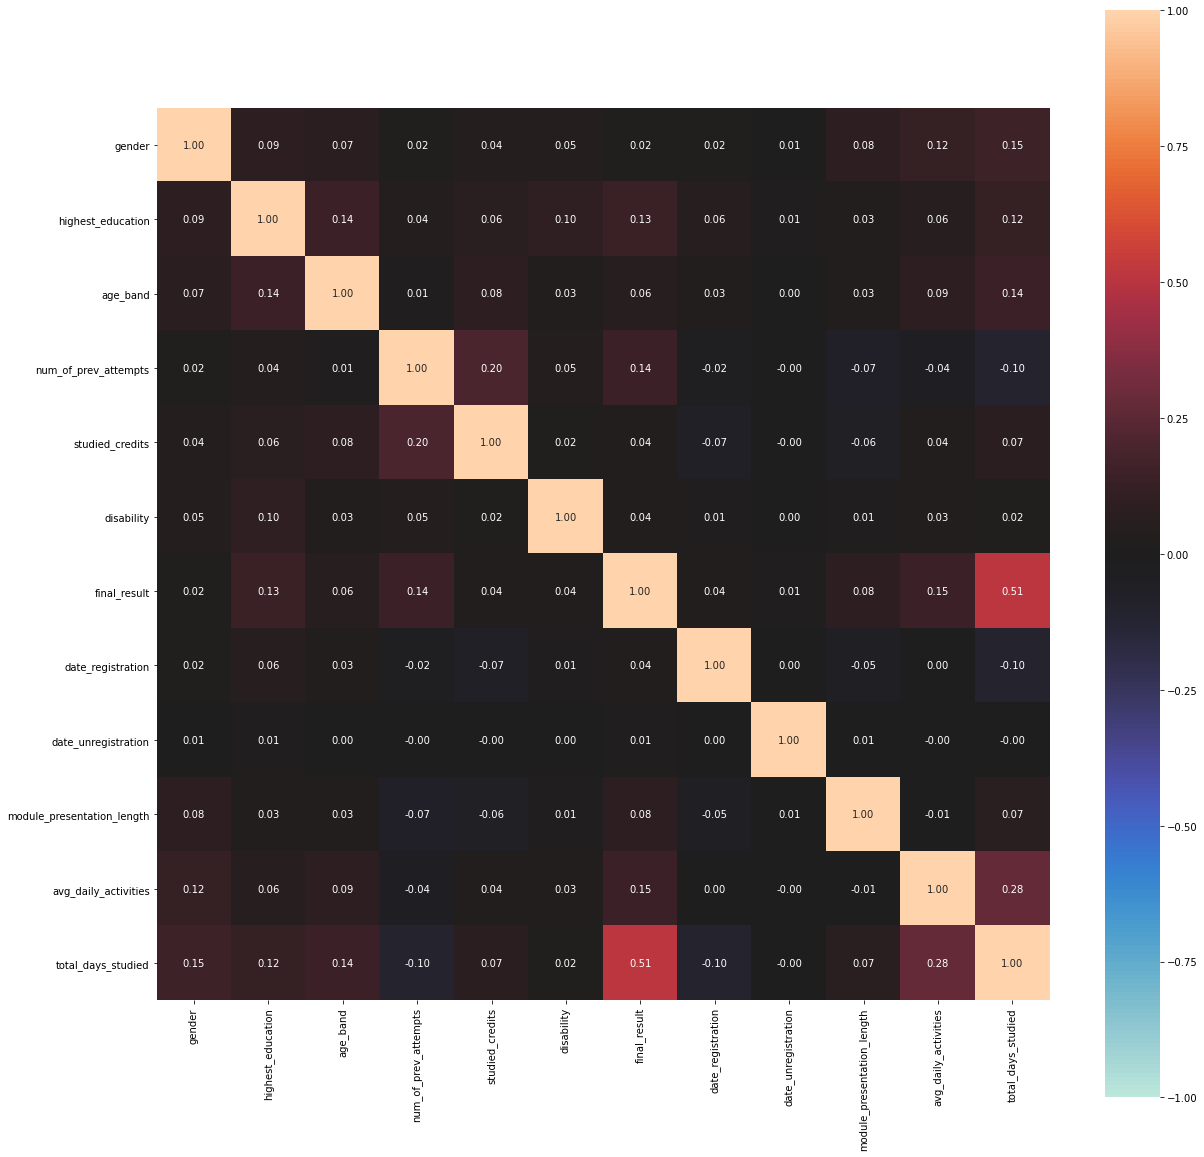

{'corr':                               gender  highest_education  age_band  \
 gender                      1.000000           0.085784  0.073877   
 highest_education           0.085784           1.000000  0.140768   
 age_band                    0.073877           0.140768  1.000000   
 num_of_prev_attempts        0.020912           0.042667  0.013336   
 studied_credits             0.040992           0.064491  0.081766   
 disability                  0.045265           0.096823  0.033701   
 final_result                0.019790           0.134526  0.062474   
 date_registration           0.019919           0.060597  0.028447   
 date_unregistration         0.007689           0.008284  0.004139   
 module_presentation_length  0.079648           0.030665  0.028581   
 avg_daily_activities        0.120207           0.057923  0.087530   
 total_days_studied          0.151371           0.118049  0.142551   
 
                             num_of_prev_attempts  studied_credits  disability  

In [5]:
associations(temp_reg, figsize = (20,20))

In [5]:
clean_reg.head()

,Unnamed: 0,code_module,code_presentation,id_student,gender,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,module_presentation_length,avg_daily_activities,total_days_studied
0,0,AAA,2013J,11391,M,HE Qualification,55<=,0,240,N,Pass,-159.0,NaN,268,4.900000,40.0
1,1,AAA,2013J,28400,F,HE Qualification,35-55,0,60,N,Pass,-53.0,NaN,268,5.375000,80.0
2,2,AAA,2013J,30268,F,A Level or Equivalent,35-55,0,60,Y,Withdrawn,-92.0,12.0,268,6.333333,12.0
3,3,AAA,2013J,31604,F,A Level or Equivalent,35-55,0,60,N,Pass,-52.0,NaN,268,5.390244,123.0
4,4,AAA,2013J,32885,F,Lower Than A Level,0-35,0,60,N,Pass,-176.0,NaN,268,5.028571,70.0


In [6]:
late_unreg = clean_reg[clean_reg['date_unregistration'] > clean_reg['module_presentation_length']/2]
late_unreg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 29 to 32523
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2078 non-null   int64  
 1   code_module                 2078 non-null   object 
 2   code_presentation           2078 non-null   object 
 3   id_student                  2078 non-null   int64  
 4   gender                      2078 non-null   object 
 5   highest_education           2078 non-null   object 
 6   age_band                    2078 non-null   object 
 7   num_of_prev_attempts        2078 non-null   int64  
 8   studied_credits             2078 non-null   int64  
 9   disability                  2078 non-null   object 
 10  final_result                2078 non-null   object 
 11  date_registration           2078 non-null   float64
 12  date_unregistration         2078 non-null   float64
 13  module_presentation_length  207

In [7]:
late_unreg.describe()

,Unnamed: 0,id_student,num_of_prev_attempts,studied_credits,date_registration,date_unregistration,module_presentation_length,avg_daily_activities,total_days_studied
count,2078.000000,2.078000e+03,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2054.000000,2054.000000
mean,15668.305101,7.170696e+05,0.217998,80.490857,-66.655438,174.421559,253.958133,5.367610,41.815969
std,8518.540452,5.838348e+05,0.552600,40.167855,49.840928,31.608970,13.122352,1.990807,32.030295
min,29.000000,2.741700e+04,0.000000,30.000000,-311.000000,118.000000,234.000000,1.000000,1.000000
25%,9349.000000,4.913165e+05,0.000000,60.000000,-95.000000,150.000000,241.000000,4.096745,18.000000
50%,15457.500000,5.809225e+05,0.000000,60.000000,-52.500000,168.000000,261.000000,5.064583,35.000000
75%,22748.500000,6.321265e+05,0.000000,110.000000,-28.000000,201.000000,268.000000,6.385561,57.000000
max,32524.000000,2.698535e+06,6.000000,330.000000,167.000000,242.000000,269.000000,37.625000,221.000000


In [9]:
early_unreg = clean_reg[clean_reg['date_unregistration'] < clean_reg['module_presentation_length']/2]
early_unreg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 2 to 32545
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  7948 non-null   int64  
 1   code_module                 7948 non-null   object 
 2   code_presentation           7948 non-null   object 
 3   id_student                  7948 non-null   int64  
 4   gender                      7948 non-null   object 
 5   highest_education           7948 non-null   object 
 6   age_band                    7948 non-null   object 
 7   num_of_prev_attempts        7948 non-null   int64  
 8   studied_credits             7948 non-null   int64  
 9   disability                  7948 non-null   object 
 10  final_result                7948 non-null   object 
 11  date_registration           7948 non-null   float64
 12  date_unregistration         7948 non-null   float64
 13  module_presentation_length  7948

In [10]:
early_unreg.describe()

,Unnamed: 0,id_student,num_of_prev_attempts,studied_credits,date_registration,date_unregistration,module_presentation_length,avg_daily_activities,total_days_studied
count,7948.000000,7.948000e+03,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,5034.000000,5034.000000
mean,15405.046049,7.066404e+05,0.178913,94.122421,-81.627957,17.709361,256.326120,5.574530,15.600119
std,8717.922513,5.383591e+05,0.503615,48.390873,53.576495,55.839240,13.205982,2.808170,16.113866
min,2.000000,3.733000e+03,0.000000,30.000000,-322.000000,-317.000000,234.000000,1.000000,1.000000
25%,8373.500000,5.166345e+05,0.000000,60.000000,-120.000000,-8.000000,241.000000,3.823529,4.000000
50%,14604.500000,5.938975e+05,0.000000,90.000000,-72.000000,12.000000,262.000000,5.250000,10.000000
75%,22934.000000,6.493062e+05,0.000000,120.000000,-36.000000,54.000000,268.000000,6.918356,22.000000
max,32546.000000,2.698591e+06,6.000000,655.000000,37.000000,134.000000,269.000000,41.000000,143.000000


In [11]:
clean_reg.describe()

,Unnamed: 0,id_student,num_of_prev_attempts,studied_credits,date_registration,date_unregistration,module_presentation_length,avg_daily_activities,total_days_studied
count,32547.000000,3.254700e+04,32547.000000,32547.000000,32547.000000,10032.000000,32547.000000,29220.000000,29220.000000
mean,16273.225366,7.061771e+05,0.163149,79.713184,-69.412757,50.236942,256.017728,5.575019,61.874675
std,9395.956326,5.483945e+05,0.479458,41.046202,49.260578,81.938635,13.177460,2.029713,54.029361
min,0.000000,3.733000e+03,0.000000,30.000000,-322.000000,-317.000000,234.000000,1.000000,1.000000
25%,8136.500000,5.085270e+05,0.000000,60.000000,-100.000000,-1.000000,241.000000,4.285714,18.000000
50%,16273.000000,5.902410e+05,0.000000,60.000000,-57.000000,28.000000,262.000000,5.319149,47.000000
75%,24409.500000,6.443965e+05,0.000000,120.000000,-29.000000,109.000000,268.000000,6.628334,92.000000
max,32547.000000,2.698591e+06,6.000000,655.000000,167.000000,242.000000,269.000000,41.000000,286.000000
